#Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/excel/netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Data exploration


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df['country'].value_counts().head(50)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [7]:
df[df['title'].duplicated() == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5964,s5965,TV Show,9-Feb,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


#Data cleaning

In [8]:
df.drop([5964,5965,5966],inplace=True)

In [9]:
df[["country1","country2","country3","country4","country5","country6","country7","country8","country9","country10","country11","country12"]]=df['country'].str.split(",",expand= True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6171 non-null   object
 4   cast          7979 non-null   object
 5   country       7974 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8801 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
 12  country1      7974 non-null   object
 13  country2      1319 non-null   object
 14  country3      446 non-null    object
 15  country4      174 non-null    object
 16  country5      60 non-null     object
 17  country6      23 non-null     object
 18  country7      9 non-null      object
 19  country8   

In [11]:
df.drop(columns=['country12','country11','country10','country9','country8','country7'],inplace=True)

In [12]:
df=pd.melt(df,id_vars=['show_id','type','title','director','cast','date_added','release_year','rating','duration','listed_in','description'],value_vars=["country1","country2","country3","country4","country5","country6"],var_name="country")

In [13]:
df

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,country,value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",country1,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",country1,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,country1,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",country1,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,country1,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52819,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",country6,None
52820,s8804,TV Show,Zombie Dumb,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",country6,NaN
52821,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,country6,None
52822,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",country6,None


In [14]:
df[["list1",'list2','list3']]=df['listed_in'].str.split(",",expand= True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52824 entries, 0 to 52823
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       52824 non-null  object
 1   type          52824 non-null  object
 2   title         52824 non-null  object
 3   director      37026 non-null  object
 4   cast          47874 non-null  object
 5   date_added    52764 non-null  object
 6   release_year  52824 non-null  int64 
 7   rating        52800 non-null  object
 8   duration      52806 non-null  object
 9   listed_in     52824 non-null  object
 10  description   52824 non-null  object
 11  country       52824 non-null  object
 12  value         9996 non-null   object
 13  list1         52824 non-null  object
 14  list2         40704 non-null  object
 15  list3         22368 non-null  object
dtypes: int64(1), object(15)
memory usage: 6.4+ MB


In [16]:
df=pd.melt(df,id_vars=['show_id','type','title','director','cast','date_added','release_year','rating','duration','description','country','value'],value_vars=['list1','list2','list3'],value_name='list_value')

In [17]:
df

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country,value,variable,list_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,25-Sep-21,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",country1,United States,list1,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",24-Sep-21,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",country1,South Africa,list1,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",24-Sep-21,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,country1,NaN,list1,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",country1,NaN,list1,Docuseries
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",24-Sep-21,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,country1,India,list1,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158467,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",20-Nov-19,2007,R,158 min,"A political cartoonist, a crime reporter and a...",country6,None,list3,Thrillers
158468,s8804,TV Show,Zombie Dumb,NaN,NaN,1-Jul-19,2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g...",country6,NaN,list3,TV Comedies
158469,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",1-Nov-19,2009,R,88 min,Looking to survive in a world taken over by zo...,country6,None,list3,None
158470,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",11-Jan-20,2006,PG,88 min,"Dragged from civilian life, a former superhero...",country6,None,list3,None


In [18]:
movies = df[df['type'] == "Movie"]

In [19]:
TV_Show	= df[df['type'] == "TV Show"]

In [20]:
v = TV_Show['duration'].str.split(" ")

In [21]:
season = []
for i in v:
  i = i[1]
  season.append(i)
print(season)

['Seasons', 'Season', 'Season', 'Seasons', 'Season', 'Seasons', 'Season', 'Season', 'Season', 'Seasons', 'Seasons', 'Season', 'Season', 'Seasons', 'Seasons', 'Season', 'Seasons', 'Season', 'Season', 'Season', 'Seasons', 'Season', 'Season', 'Seasons', 'Season', 'Seasons', 'Seasons', 'Season', 'Seasons', 'Season', 'Season', 'Seasons', 'Seasons', 'Season', 'Seasons', 'Season', 'Season', 'Seasons', 'Seasons', 'Seasons', 'Seasons', 'Seasons', 'Season', 'Season', 'Seasons', 'Season', 'Seasons', 'Seasons', 'Season', 'Seasons', 'Season', 'Season', 'Season', 'Season', 'Season', 'Seasons', 'Season', 'Season', 'Season', 'Season', 'Seasons', 'Seasons', 'Seasons', 'Season', 'Season', 'Season', 'Season', 'Season', 'Seasons', 'Season', 'Season', 'Season', 'Season', 'Seasons', 'Seasons', 'Season', 'Season', 'Seasons', 'Season', 'Season', 'Season', 'Season', 'Season', 'Seasons', 'Season', 'Seasons', 'Season', 'Season', 'Season', 'Season', 'Seasons', 'Season', 'Seasons', 'Season', 'Season', 'Seasons', '

In [22]:
season_number = []
for i in v:
  i = i[0]
  season_number.append(i)
print(season_number)

['2', '1', '1', '2', '1', '9', '1', '1', '1', '4', '2', '1', '1', '5', '2', '1', '3', '1', '1', '1', '3', '1', '1', '2', '1', '6', '6', '1', '9', '1', '1', '5', '2', '1', '6', '1', '1', '2', '4', '2', '3', '2', '1', '1', '2', '1', '2', '5', '1', '5', '1', '1', '1', '1', '1', '3', '1', '1', '1', '1', '2', '3', '4', '1', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '3', '1', '1', '4', '1', '1', '1', '1', '1', '3', '1', '3', '1', '1', '1', '1', '5', '1', '2', '1', '1', '2', '1', '5', '1', '7', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1', '1', '3', '1', '2', '1', '1', '1', '1', '1', '1', '1', '7', '3', '1', '5', '6', '3', '1', '3', '1', '1', '2', '1', '1', '7', '1', '3', '3', '4', '1', '10', '4', '1', '1', '1', '2', '2', '5', '1', '1', '1', '1', '3', '1', '1', '2', '1', '2', '1', '1', '1', '4', '2', '1', '1', '3', '1', '1', '1', '2', '2', '1', '3', '2', '2', '4', '3', '5', '2', '2', '2', '2', '2', '5', '3', '3', '2', '8', '7', '2', '2', '3', '3', '2', '3', '6', '2', '2', '4', '2'

In [23]:
TV_Show['season_number'] = season_number

<ipython-input-23-4875598383b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_Show['season_number'] = season_number


In [24]:
TV_Show['duration_type'] = season

<ipython-input-24-9cc842d6e059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_Show['duration_type'] = season


In [25]:
TV_Show = TV_Show.drop(columns=["duration"])

In [26]:
TV_Show['season_number']=TV_Show['season_number'].astype(int)

In [27]:
movies

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country,value,variable,list_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,25-Sep-21,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",country1,United States,list1,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",24-Sep-21,2021,PG,91 min,Equestria's divided. But a bright-eyed hero be...,country1,NaN,list1,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",24-Sep-21,1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",country1,United States,list1,Dramas
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",24-Sep-21,2021,PG-13,104 min,A woman adjusting to life after a loss contend...,country1,United States,list1,Comedies
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",23-Sep-21,2021,TV-MA,127 min,After most of her family is murdered in a terr...,country1,Germany,list1,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158466,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",9-Mar-16,2015,TV-MA,96 min,Recovering alcoholic Talal wakes up inside a s...,country6,None,list3,Thrillers
158467,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",20-Nov-19,2007,R,158 min,"A political cartoonist, a crime reporter and a...",country6,None,list3,Thrillers
158469,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",1-Nov-19,2009,R,88 min,Looking to survive in a world taken over by zo...,country6,None,list3,None
158470,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",11-Jan-20,2006,PG,88 min,"Dragged from civilian life, a former superhero...",country6,None,list3,None


In [28]:
b = movies['duration'].str.split(" ")

In [29]:
v = []
for i in b:
    if isinstance(i, list) and len(i) > 1:
        try:
            value = int(i[0])
            v.append(value)
        except ValueError:
            v.append(None)
    else:
        v.append(None)
print(v)

[90, 91, 125, 104, 127, 91, 67, 94, 161, 61, 166, 147, 103, 97, 106, 111, 110, 105, 96, 124, 116, 98, 91, 23, 115, 122, 99, 99, 88, 100, 102, 93, 96, 95, 85, 97, 95, 83, 103, 113, 13, 182, 106, 48, 145, 145, 93, 106, 147, 87, 96, 95, 92, 91, 90, 97, 80, 117, 128, 90, 119, 110, 143, 119, 114, 94, 106, 99, 118, 115, 95, 115, 108, 63, 117, 121, 142, 113, 154, 95, 108, 120, 100, 82, 124, 114, 104, 94, 94, 93, 97, 109, 88, 101, 105, 102, 101, 103, 106, 118, 86, 121, 229, 76, 95, 98, 89, 120, 110, 83, 121, 105, 94, 156, 112, 95, 107, 114, 129, 86, 97, 125, 107, 127, 128, 92, 135, 124, 136, 165, 124, 136, 150, 112, 119, 133, 142, 93, 113, 124, 116, 106, 145, 93, 95, 108, 90, 86, 92, 82, 70, 122, 122, 122, 122, 84, 96, 115, 110, 88, 102, 91, 105, 135, 86, 140, 133, 92, 82, 97, 78, 94, 121, 97, 110, 64, 59, 101, 127, 90, 114, 108, 70, 98, 86, 139, 111, 115, 102, 100, 135, 69, 95, 97, 124, 118, 115, 115, 104, 106, 102, 97, 87, 88, 114, 90, 142, 90, 105, 103, 116, 113, 99, 96, 148, 189, 97, 102, 

In [30]:
duration_type = []

for i in movies['duration']:
    if isinstance(i, str):
        parts = i.split()
        if len(parts) > 1:
            duration_type.append(parts[1])
        else:
            duration_type.append(None)
    else:
        duration_type.append(None)
print(duration_type)

['min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min', 'min'

In [31]:
movies["duration_Time"] = v

<ipython-input-31-713611d76496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration_Time"] = v


In [32]:
movies["duration_type"] = duration_type

<ipython-input-32-f5d7d78ab35b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration_type"] = duration_type


In [33]:
movies = movies.drop(columns=["duration"])

In [34]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110322 entries, 0 to 158471
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   show_id        110322 non-null  object 
 1   type           110322 non-null  object 
 2   title          110322 non-null  object 
 3   director       106938 non-null  object 
 4   cast           101772 non-null  object 
 5   date_added     110322 non-null  object 
 6   release_year   110322 non-null  int64  
 7   rating         110286 non-null  object 
 8   description    110322 non-null  object 
 9   country        110322 non-null  object 
 10  value          22074 non-null   object 
 11  variable       110322 non-null  object 
 12  list_value     79110 non-null   object 
 13  duration_Time  110268 non-null  float64
 14  duration_type  110268 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 13.5+ MB


In [35]:
TV_Show.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48150 entries, 1 to 158468
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   show_id        48150 non-null  object
 1   type           48150 non-null  object
 2   title          48150 non-null  object
 3   director       4140 non-null   object
 4   cast           41850 non-null  object
 5   date_added     47970 non-null  object
 6   release_year   48150 non-null  int64 
 7   rating         48114 non-null  object
 8   description    48150 non-null  object
 9   country        48150 non-null  object
 10  value          7914 non-null   object
 11  variable       48150 non-null  object
 12  list_value     36786 non-null  object
 13  season_number  48150 non-null  int64 
 14  duration_type  48150 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.9+ MB


In [36]:
movies['date_added'] = pd.to_datetime(movies['date_added'])

<ipython-input-36-97ddcf2550ad>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  movies['date_added'] = pd.to_datetime(movies['date_added'])


In [37]:
TV_Show['date_added'] = pd.to_datetime(TV_Show['date_added'])

<ipython-input-37-657f664dae65>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  TV_Show['date_added'] = pd.to_datetime(TV_Show['date_added'])


In [38]:
movies.head()

,show_id,type,title,director,cast,date_added,release_year,rating,description,country,value,variable,list_value,duration_Time,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",country1,United States,list1,Documentaries,90.0,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,Equestria's divided. But a bright-eyed hero be...,country1,NaN,list1,Children & Family Movies,91.0,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,"On a photo shoot in Ghana, an American model s...",country1,United States,list1,Dramas,125.0,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,country1,United States,list1,Comedies,104.0,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021-09-23,2021,TV-MA,After most of her family is murdered in a terr...,country1,Germany,list1,Dramas,127.0,min


In [39]:
movies.drop_duplicates()

,show_id,type,title,director,cast,date_added,release_year,rating,description,country,value,variable,list_value,duration_Time,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",country1,United States,list1,Documentaries,90.0,min
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",2021-09-24,2021,PG,Equestria's divided. But a bright-eyed hero be...,country1,NaN,list1,Children & Family Movies,91.0,min
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",2021-09-24,1993,TV-MA,"On a photo shoot in Ghana, an American model s...",country1,United States,list1,Dramas,125.0,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",2021-09-24,2021,PG-13,A woman adjusting to life after a loss contend...,country1,United States,list1,Comedies,104.0,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",2021-09-23,2021,TV-MA,After most of her family is murdered in a terr...,country1,Germany,list1,Dramas,127.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158466,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...",2016-03-09,2015,TV-MA,Recovering alcoholic Talal wakes up inside a s...,country6,None,list3,Thrillers,96.0,min
158467,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",2019-11-20,2007,R,"A political cartoonist, a crime reporter and a...",country6,None,list3,Thrillers,158.0,min
158469,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",2019-11-01,2009,R,Looking to survive in a world taken over by zo...,country6,None,list3,None,88.0,min
158470,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,"Dragged from civilian life, a former superhero...",country6,None,list3,None,88.0,min


In [40]:
df_unique = df.drop_duplicates(subset = "show_id")

# Data analysis

##Comparison between movies and Tv_Shows

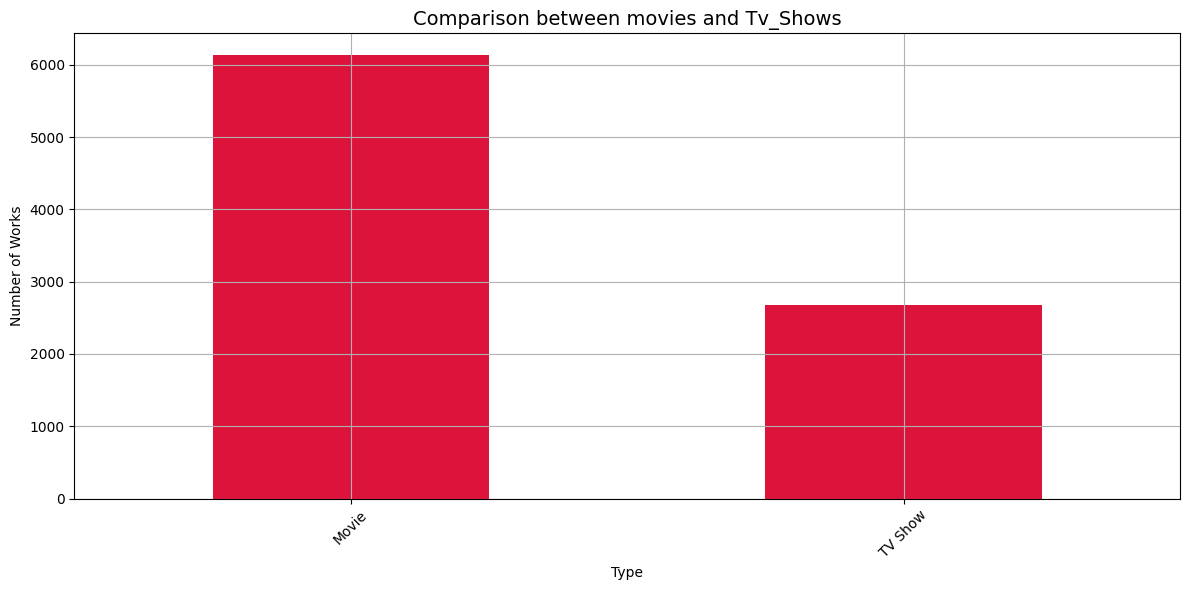

In [53]:
plt.figure(figsize=(12, 6))
df_unique['type'].value_counts().plot(kind='bar',color='crimson',grid=True)
plt.title('Comparison between movies and Tv_Shows', fontsize=14)
plt.xlabel('Type')
plt.ylabel('Number of Works')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Top 10 Directors by Works

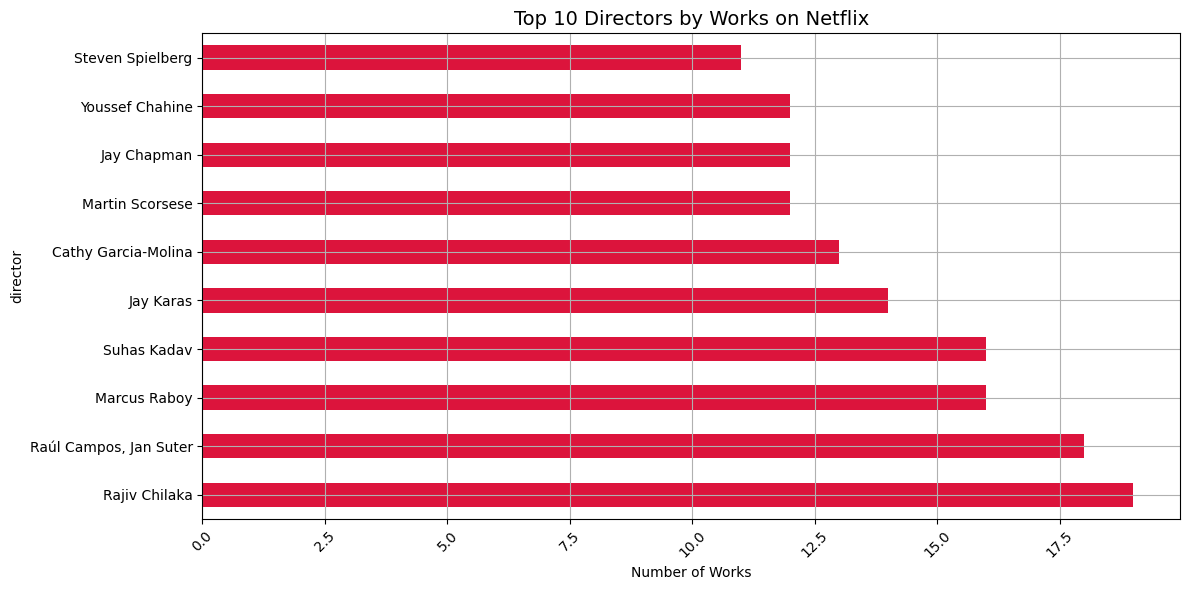

In [52]:
plt.figure(figsize=(12, 6))
df_unique['director'].value_counts().head(10).plot(kind='barh',color='crimson',grid=True)
plt.title('Top 10 Directors by Works on Netflix', fontsize=14)
plt.xlabel('Number of Works')
plt.ylabel('director')
plt.xlim=(0,20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Works by Year

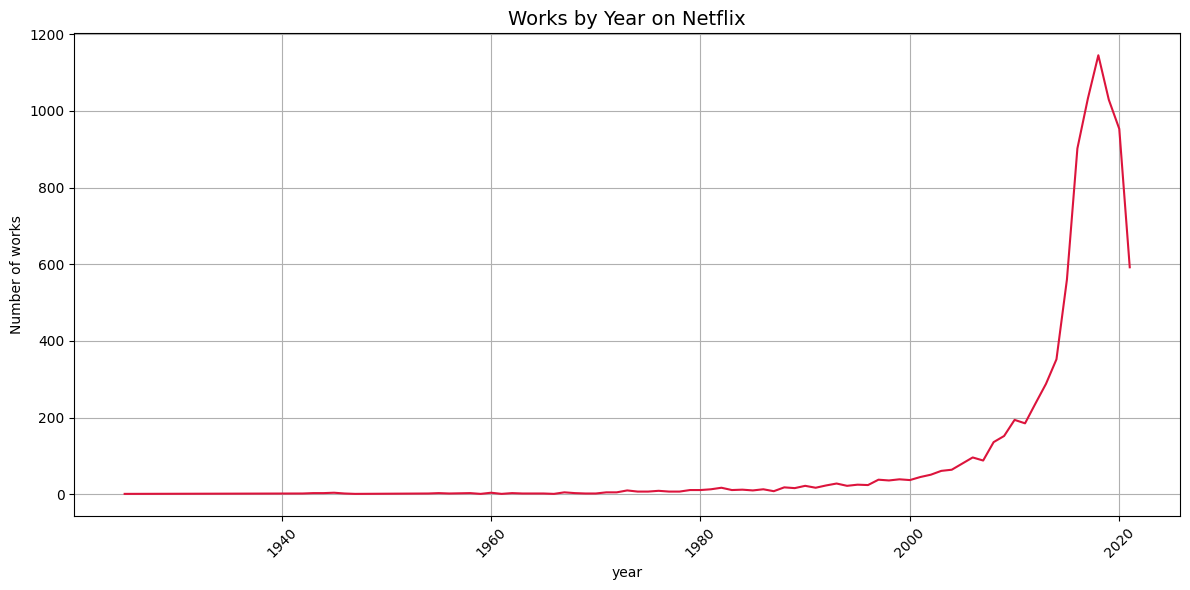

In [43]:
plt.figure(figsize=(12, 6))
df_unique['release_year'].value_counts().sort_index().plot(kind='line',color='crimson',grid=True)
plt.title('Works by Year on Netflix', fontsize=14)
plt.xlabel('year')
plt.ylabel('Number of works')
plt.xlim=(0,20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 10 Countries by Movies

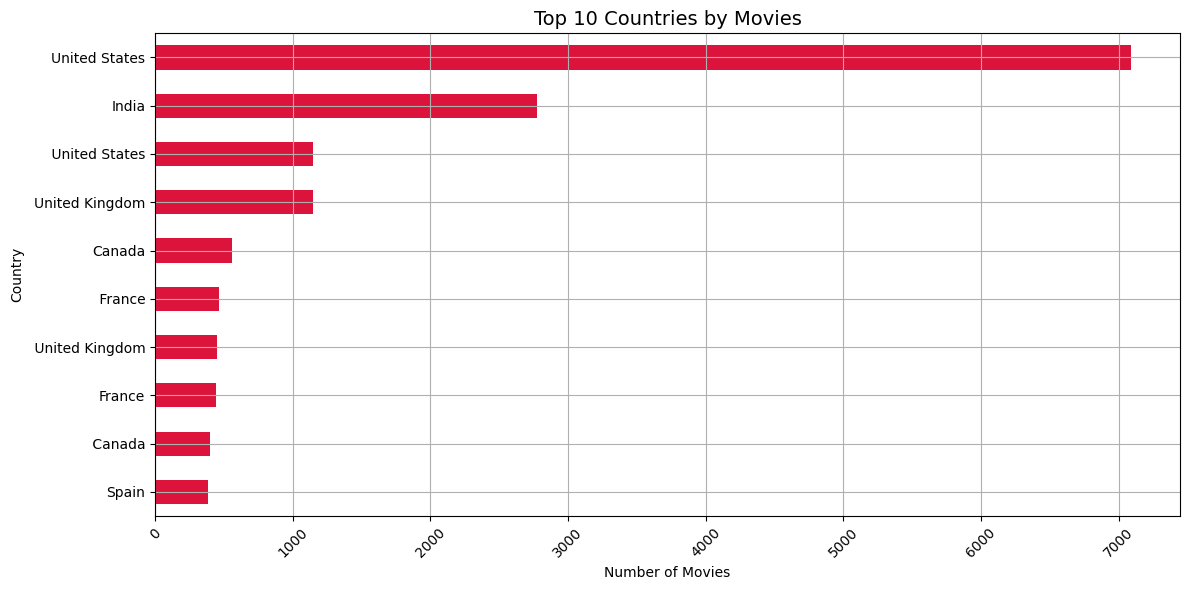

In [57]:
plt.figure(figsize=(12, 6))
movies['value'].value_counts().head(10).sort_values().plot(kind='barh',color='crimson',grid=True)
plt.title('Top 10 Countries by Movies', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 10 Countries by TV_Shows

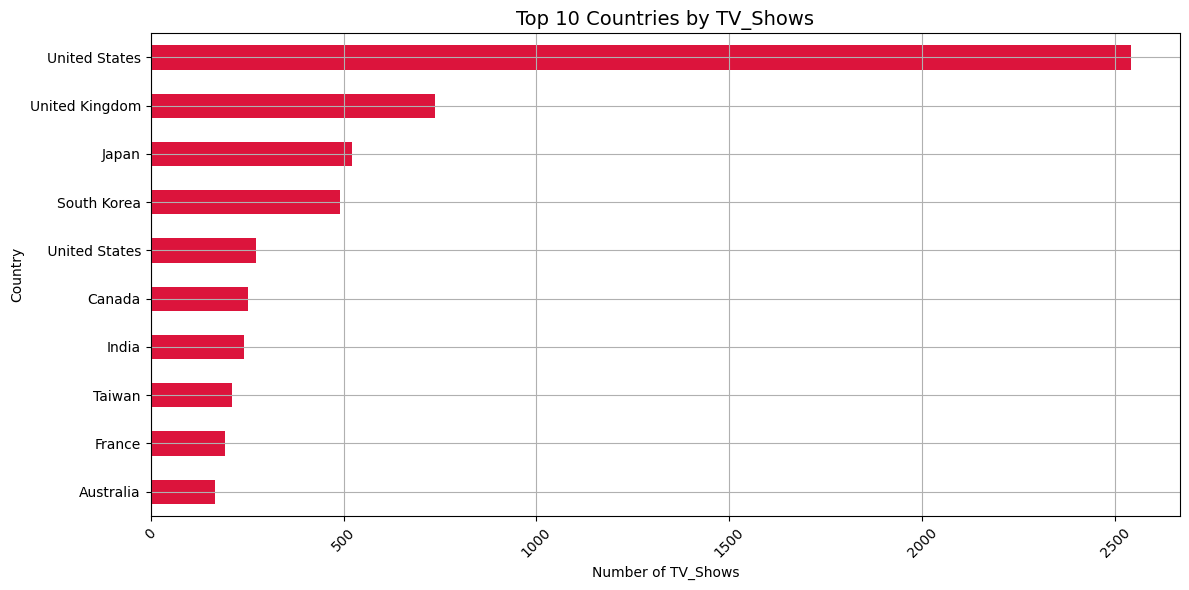

In [56]:
plt.figure(figsize=(12, 6))
TV_Show['value'].value_counts().head(10).sort_values().plot(kind='barh',color='crimson',grid=True)
plt.title('Top 10 Countries by TV_Shows', fontsize=14)
plt.xlabel('Number of TV_Shows')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 10 categories by Movies

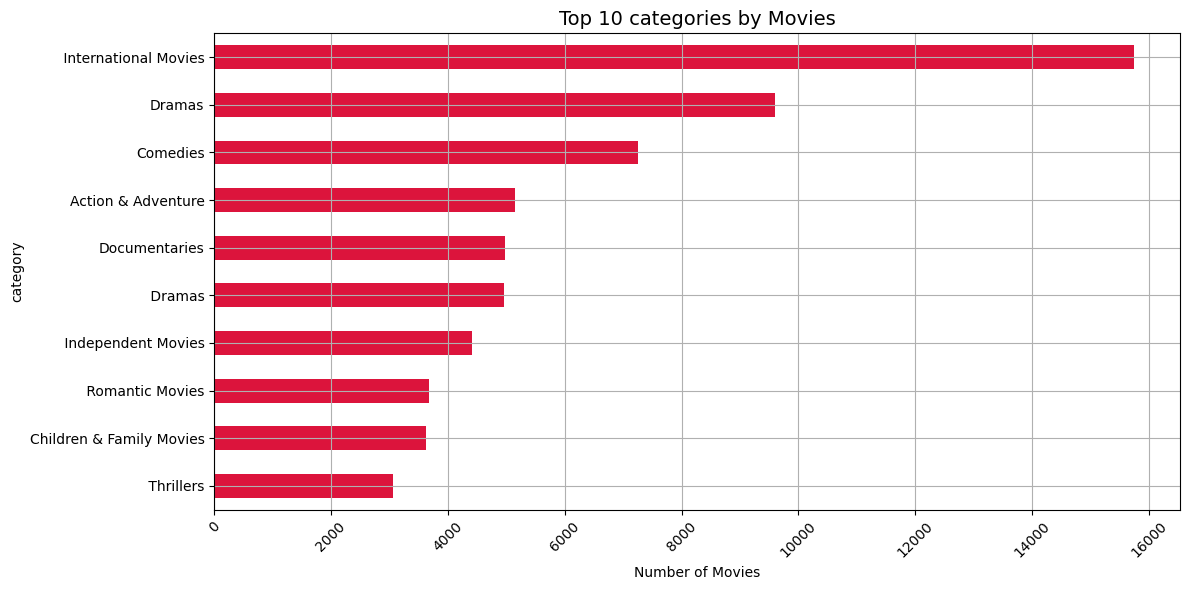

In [58]:
plt.figure(figsize=(12, 6))
movies['list_value'].value_counts().head(10).sort_values().plot(kind='barh',color='crimson',grid=True)
plt.title('Top 10 categories by Movies', fontsize=14)
plt.xlabel('Number of Movies')
plt.ylabel('category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Top 10 categories by TV_Shows

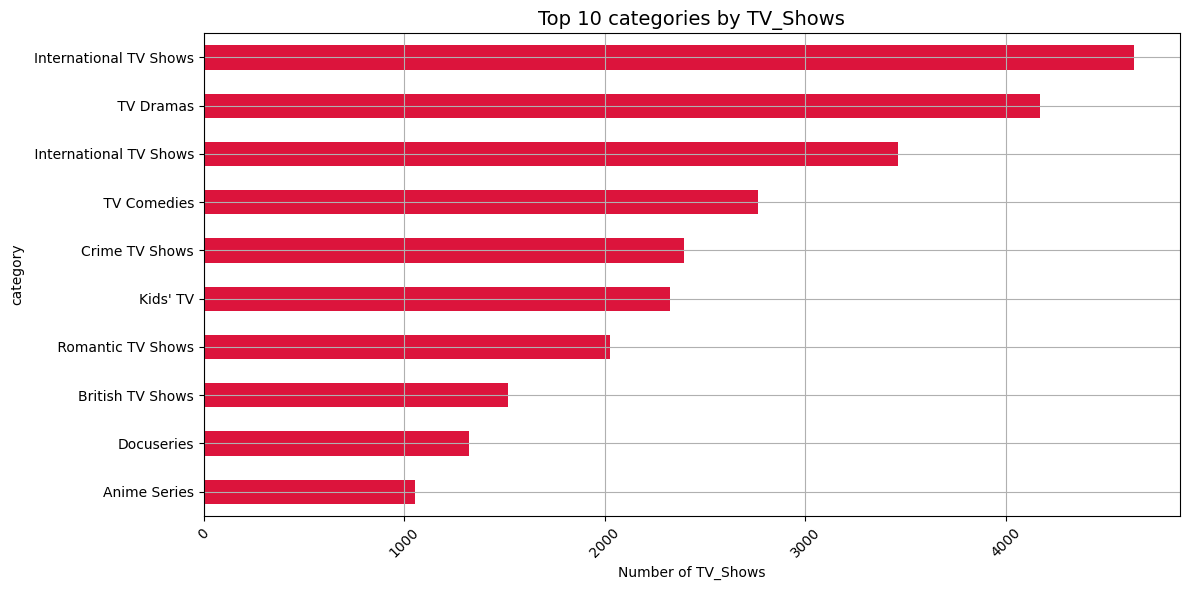

In [59]:
plt.figure(figsize=(12, 6))
TV_Show['list_value'].value_counts().head(10).sort_values().plot(kind='barh',color='crimson',grid=True)
plt.title('Top 10 categories by TV_Shows', fontsize=14)
plt.xlabel('Number of TV_Shows')
plt.ylabel('category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()